<a href="https://colab.research.google.com/github/cvs2010/computer_vision/blob/main/Aula_5_Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
# Importando bibliotecas
import dlib
import cv2
import imutils
from imutils import face_utils
import urllib.request
import requests
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import time

# Bibliotecas para a webcam
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
from io import BytesIO
import json

In [3]:
detector_faces = dlib.get_frontal_face_detector()

In [8]:
# Carregar arquivo dat do github
url = "https://github.com/cvs2010/computer_vision/releases/download/v1.0.0/shape_predictor_68_face_landmarks.dat"

response = requests.get(url)
response.raise_for_status()

with open('/content/shape_predictor_68_face_landmarks.dat', 'wb') as file:
    file.write(response.content)

In [10]:
# Carregar foto do github
url = "https://github.com/cvs2010/computer_vision/blob/main/files/foto_ccc.png?raw=true"

response = requests.get(url)
response.raise_for_status()

with open('/content/foto_ccc.png', 'wb') as file:
    file.write(response.content)

In [9]:
predictor_points = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")

In [35]:
image_face = cv2.imread("/content/foto_ccc.png")

In [36]:
image_face = imutils.resize(image_face, width=500)

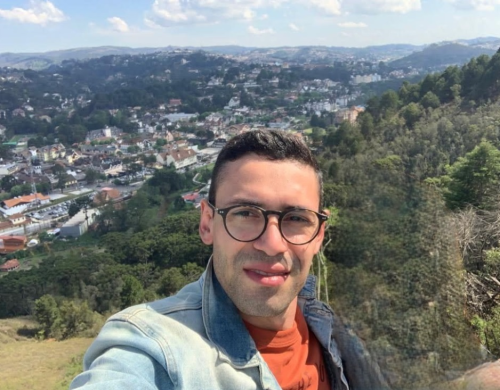

In [37]:
cv2_imshow(image_face)

In [14]:
image_gray = cv2.cvtColor(image_face, cv2.COLOR_BGR2GRAY)

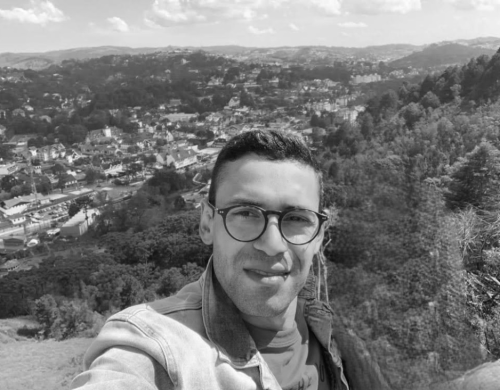

In [16]:
cv2_imshow(image_gray)

In [17]:
rects_detector = detector_faces(image_gray, 1)

In [20]:
# Coordenadas das faces
rects_detector

rectangles[[(210, 182) (339, 311)]]

In [21]:
# Tipo retângulo do Dlib
type(rects_detector)

_dlib_pybind11.rectangles

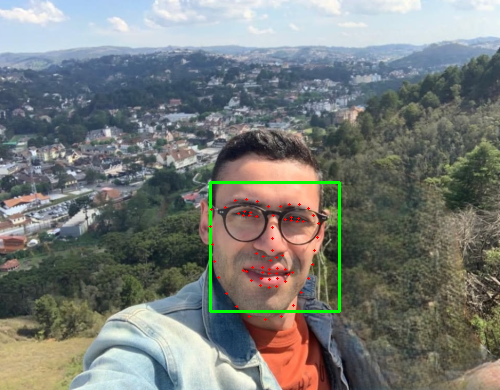

In [38]:
# Coordenadas das faces (Esse foto tem uma face, para mais faces deve-se modificar o código)
# Help at: https://github.com/PyImageSearch/imutils/blob/master/imutils/face_utils/helpers.py
#          https://zoomout.medium.com/how-to-use-facial-landmarks-obtained-from-dlib-b82129e5b352

for (i, rect) in enumerate(rects_detector):
    reference_Landmarks = predictor_points(image_gray, rect)
    reference_points = face_utils.shape_to_np(reference_Landmarks)
    # Convertendo o retângulo para uma caixa delimitadora (bb = bounding box)
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image_face, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Mostrando os pontos de referencia no rosto
for (x, y) in reference_points:
    cv2.circle(image_face, (x, y), 1, (0, 0, 255), -1)

cv2_imshow(image_face)

In [39]:
# Pontos de referencia
print('X:', x, 'Y:', y, 'W:', w, 'H:', h)

X: 261 Y: 278 W: 129 H: 129


In [23]:
reference_points

array([[211, 209],
       [210, 226],
       [212, 244],
       [214, 261],
       [218, 277],
       [226, 293],
       [236, 306],
       [249, 316],
       [265, 319],
       [281, 316],
       [293, 305],
       [301, 292],
       [308, 278],
       [312, 264],
       [314, 250],
       [317, 237],
       [318, 223],
       [225, 207],
       [235, 200],
       [246, 199],
       [257, 201],
       [268, 206],
       [280, 206],
       [289, 204],
       [299, 204],
       [308, 208],
       [313, 215],
       [273, 215],
       [272, 227],
       [272, 238],
       [272, 250],
       [256, 253],
       [263, 256],
       [270, 260],
       [276, 257],
       [282, 255],
       [238, 213],
       [244, 211],
       [250, 212],
       [256, 216],
       [249, 215],
       [243, 215],
       [285, 219],
       [291, 217],
       [298, 218],
       [303, 221],
       [297, 221],
       [291, 220],
       [243, 270],
       [252, 267],
       [262, 267],
       [269, 269],
       [277,

In [24]:
reference_points.shape

(68, 2)

In [46]:
help(reference_points)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

# Função para capturar a webcam

In [90]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# Função para detectar as landmarks usando a webcam

In [ ]:
# Load the pre-trained face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Function to convert an image array to bytes
def image_to_bytes(image_array):
    pil_image = Image.fromarray(image_array)
    stream = BytesIO()
    pil_image.save(stream, format='JPEG')
    image_bytes = stream.getvalue()
    encoded_bytes = base64.b64encode(image_bytes)
    return encoded_bytes.decode('utf-8')

# Start capturing video from webcam
video_stream()

# Label for video
label_html = 'Capturing...'
# Initialize bounding box to empty
bbox = ''

while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # Convert JS response to OpenCV image
    img = js_to_image(js_reply['img'])

    # Create transparent overlay for bounding box
    bbox_array = np.zeros_like(img)

    # Convert the frame to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Detect faces in the grayscale frame
    faces = detector(gray)

    # Draw rectangles and circles around the faces
    for face in faces:
        # Detect facial landmarks
        landmarks = predictor(gray, face)
        landmarks = face_utils.shape_to_np(landmarks)

        # Draw rectangles around the faces
        (x, y, w, h) = face_utils.rect_to_bb(face)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Draw circles around the facial landmarks (eyes and mouth)
        for (x, y) in landmarks:
            cv2.circle(img, (x, y), 2, (0, 0, 255), -1)

        # Draw rectangles and circles on the overlay
        cv2.rectangle(bbox_array, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for (x, y) in landmarks:
            cv2.circle(bbox_array, (x, y), 2, (0, 0, 255), -1)

    # Convert the image array to bytes
    img_bytes = image_to_bytes(img)

    # Convert overlay of bbox into bytes
    bbox_bytes = image_to_bytes(bbox_array)

    # Update bbox so the next frame gets a new overlay
    bbox = bbox_bytes

    # Display the frame with bounding boxes and circles
    cv2_imshow(img)

    # Check if the 'q' key is pressed to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
video_webcam.release()
cv2.destroyAllWindows()